In [1]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np

import cmbo
from IPython.display import display

from plot_cluster import *
from score_individual_objects import *

%load_ext autoreload
%autoreload 2

COLORS = [
    "#25ced1",  # robin-egg-blue
    "#ef476f",  # bright-pink-crayola
    "#731dd8",  # french-violet
    "#522b29",  # caput-mortuum
    "#157f1f",  # office-green
]

/Users/rstiskalek/Projects/CMBOlympics/venv_cmbo/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cfg = cmbo.utils.load_config("/Users/rstiskalek/Projects/CMBOlympics/scripts/config.toml")
obs_clusters = cmbo.io.load_observed_clusters(cfg['paths']['observed_clusters'])


In [3]:
associations_cb1, matches_cb1, boxsize_cb1 = load_associations_and_matches("csiborg1", cfg)
associations_cb2, matches_cb2, boxsize_cb2 = load_associations_and_matches("csiborg2", cfg)
associations_manti, matches_manti, boxsize_manti = load_associations_and_matches("manticore", cfg)

Loaded 101 simulation realisations.
Identified 521 halo associations.
Loaded 19 observed clusters.


100%|██████████| 521/521 [00:02<00:00, 197.15it/s]


Cluster 17 (Shapley (A3562)) now orphaned (best remaining p=8.911e-02)
Cluster 8 (Hercules (A2147)) now orphaned (best remaining p=7.546e-02)
Halo signal datasets were not found in the run_suite output; p-values only.
Loaded 20 simulation realisations.
Identified 358 halo associations.
Loaded 19 observed clusters.


100%|██████████| 358/358 [00:02<00:00, 176.67it/s]


Perseus (A426): min p-value = 9.167e-01
Cluster 17 (Shapley (A3562)) now orphaned (best remaining p=9.335e-02)
Cluster 18 (Perseus (A426)) now orphaned (best remaining p=9.167e-01)
Cluster 8 (Hercules (A2147)) now orphaned (best remaining p=1.303e-01)
Halo signal datasets were not found in the run_suite output; p-values only.
Loaded 50 simulation realisations.
Identified 537 halo associations.
Loaded 19 observed clusters.


100%|██████████| 537/537 [00:02<00:00, 213.64it/s]

Cluster 17 (Shapley (A3562)) now orphaned (best remaining p=9.659e-02)
Cluster 10 (Hercules (A2151)) now orphaned (best remaining p=1.932e-01)
Halo signal datasets were not found in the run_suite output; p-values only.


In [4]:
print_cluster_scores(cfg, matches_cb2, obs_clusters,)

                                                                                                                   tSZ significance            
Cluster                  Assoc   Frac  logM [Msun/h] Pfeifer pval  Dist [Mpc/h]  ell [deg]    b [deg]    Frac p<0.05     P05%     P50%     P95%
-----------------------------------------------------------------------------------------------------------------------------------------------
Abell 1644                   6   1.00          14.47      3.0e-03       139.240     305.01      45.34        100.00%  2.2e-03  2.6e-03  5.5e-03
Abell 119                    8   1.00          14.62      7.7e-04       125.820     125.51     -64.09        100.00%  3.5e-03  4.3e-03  5.5e-03
Abell 548                   14   1.00          14.25      1.7e-03       120.259     230.17     -24.48         65.00%  3.0e-02  4.3e-02  6.8e-02
Abell 1736                   5   1.00          14.69      3.4e-05       136.163     312.77      34.93        100.00%  3.6e-03  4.4e-03  

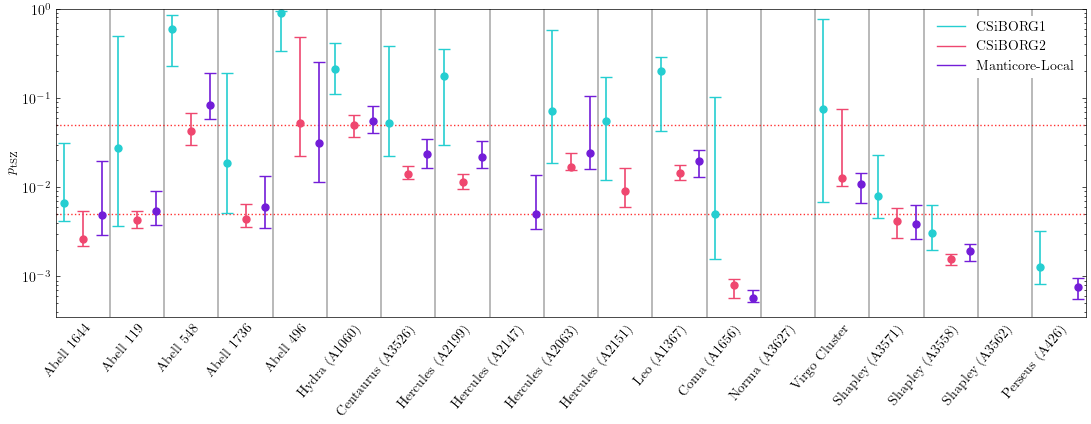

In [9]:
fig, ax = plot_cluster_pvalue_percentiles(
    cfg, [matches_cb1, matches_cb2, matches_manti], obs_clusters,
    suite_labels=["CSiBORG1", "CSiBORG2", "Manticore-Local"],
    suite_colors=COLORS,
    )
fig.savefig("/Users/rstiskalek/Downloads/cluster_pvalue_violins.png", dpi=300, bbox_inches="tight")

display(fig)

In [ ]:
fig, ax = plot_pfeifer_vs_tsz(matches_manti)
display(fig)

In [ ]:
fname_cmb = "/Users/rstiskalek/Projects/CMBOlympics/data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits"
cmb_tsz = cmbo.io.read_Planck_comptonSZ(fname_cmb)
cmb_tsz = cmbo.utils.smooth_map_gaussian(cmb_tsz, fwhm_arcmin=9.6, )

profiler2d = cmbo.corr.Pointing2DCutout(cmb_tsz, fwhm_arcmin=9.6)

In [ ]:
profiler2d.find_centers_observed_clusters(obs_clusters, size_arcmin=60)

In [ ]:
fig, ax = plot_observed_cluster_grid(obs_clusters, matches, boxsize,)

display(fig)